In [14]:
import pandas as pnd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif
from scipy.stats import pearsonr

auto_data = pnd.read_csv(f'Automobile_data.csv', sep=',')

print(auto_data.head())

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-ratio hor

In [15]:
print(auto_data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


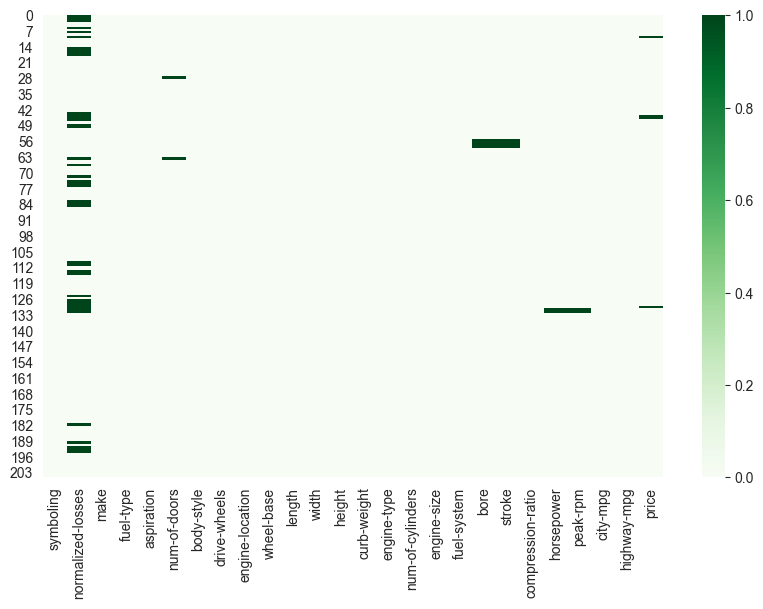

In [16]:
auto_data.replace('?', np.nan, inplace=True)
plt.figure(figsize=(10, 6))
print(auto_data.isnull().sum())
sns.heatmap(auto_data.isnull(), cmap='Greens')
plt.show()

Заміна '?' на Nan, дозволяє прибрати поля з пустими значеннями

In [17]:
auto_data = auto_data.dropna()
print(auto_data.isnull().sum())

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [18]:
print(auto_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non-null

Бачимо, що деякі рядки, які повинні бути числовими, є типом object, конвертуємо їх до числових типів

In [19]:
columns_to_convert = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']  
for col in columns_to_convert:
    auto_data[col] = pnd.to_numeric(auto_data[col], errors='coerce')  
print(auto_data.info())    

<class 'pandas.core.frame.DataFrame'>
Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non-null

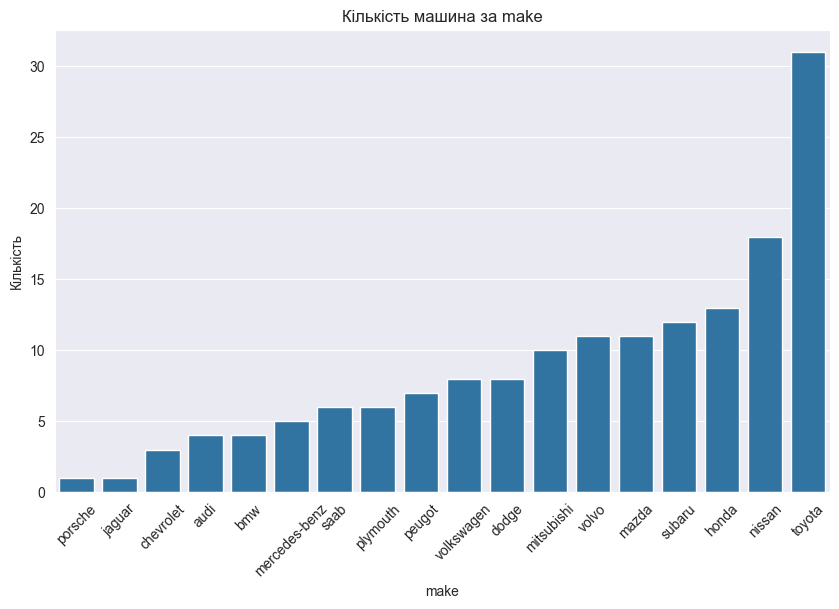

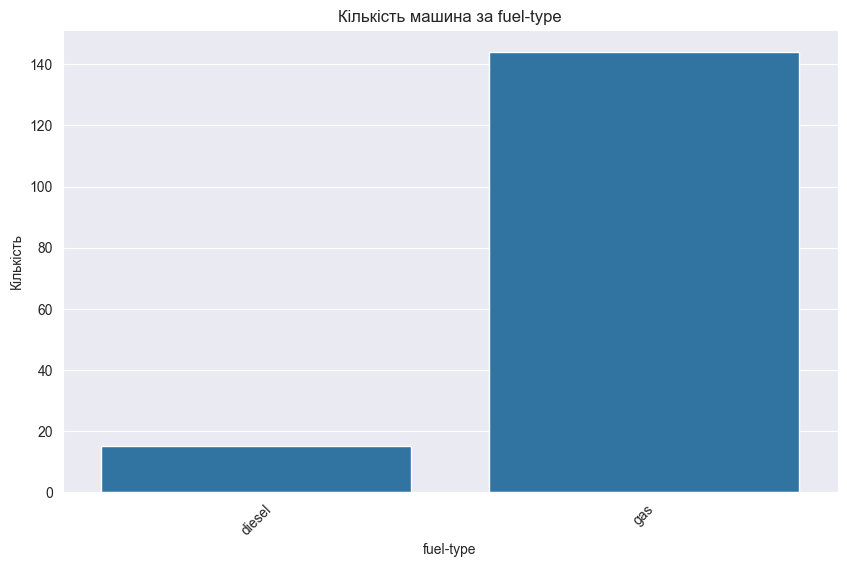

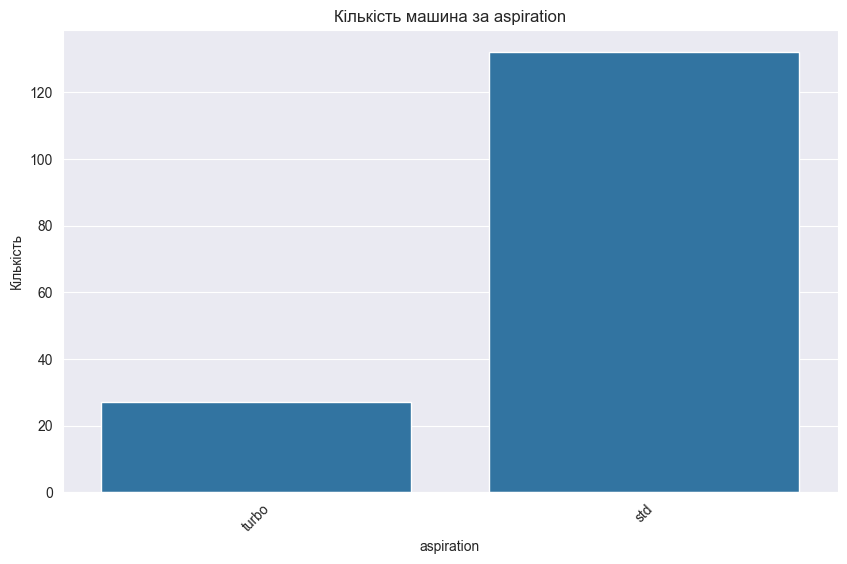

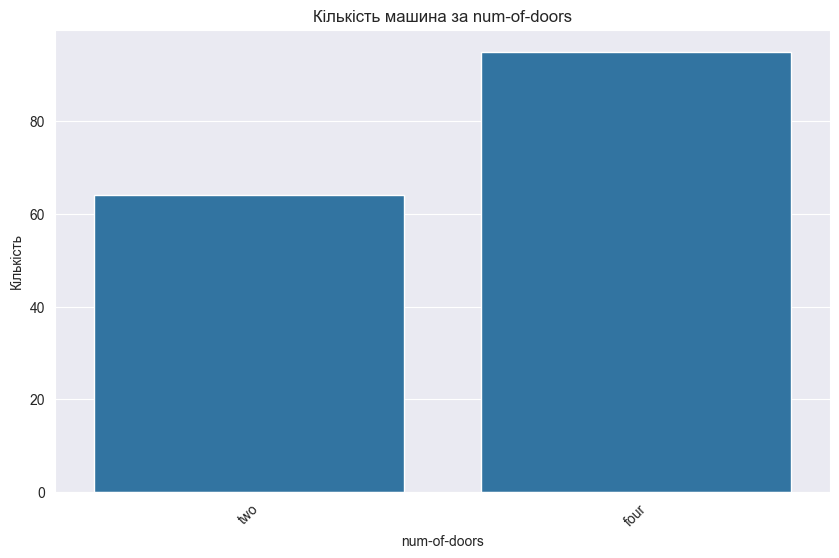

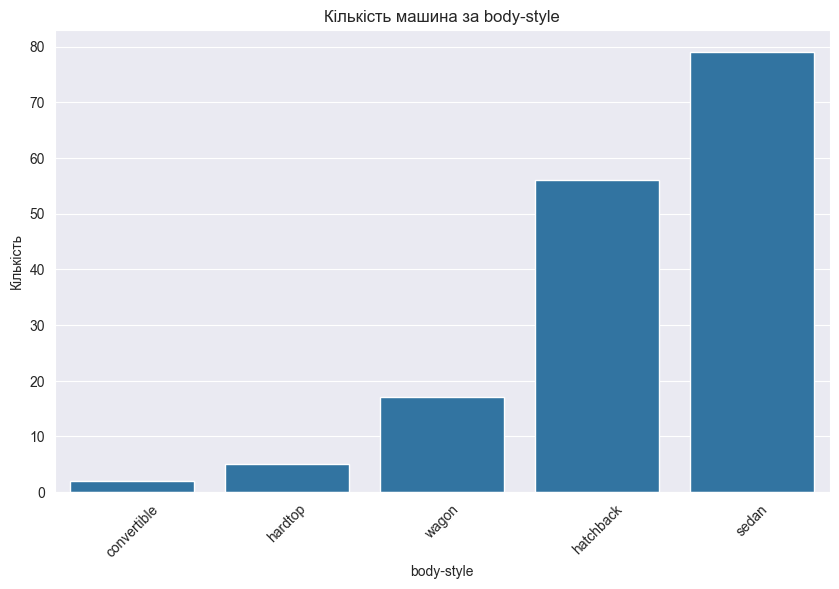

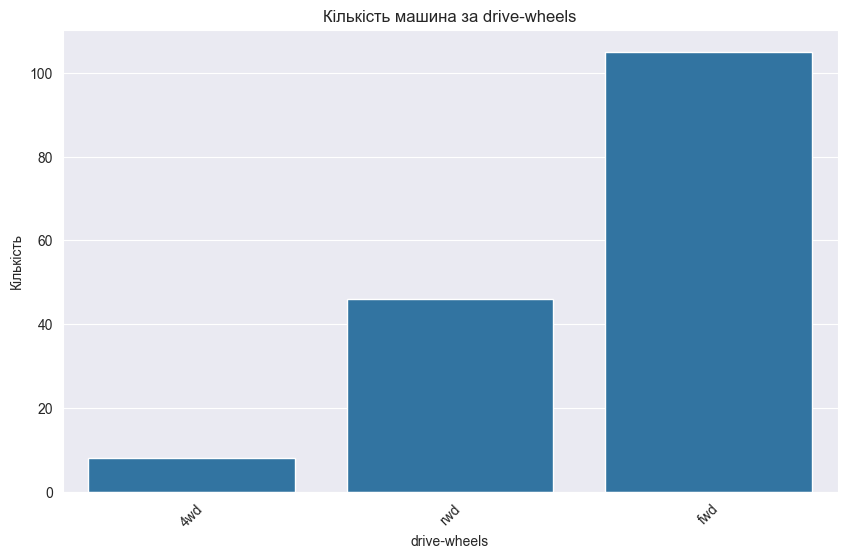

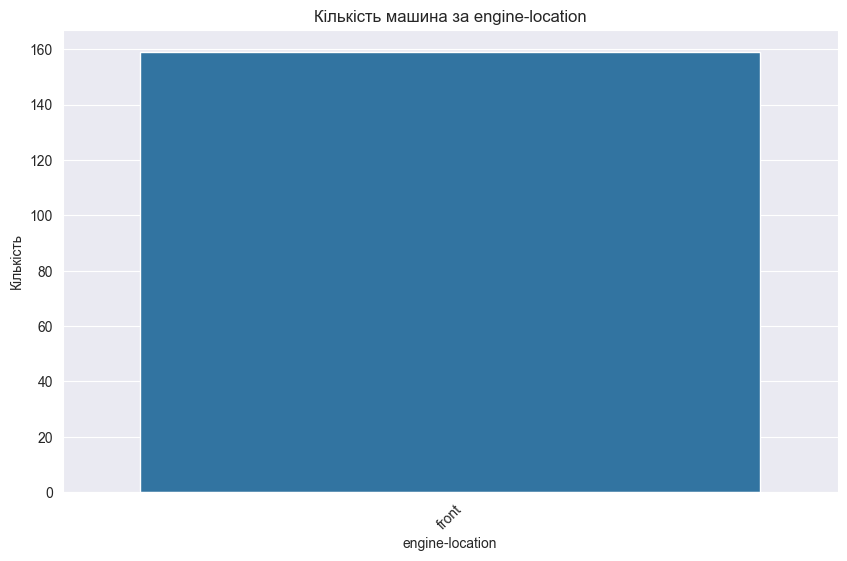

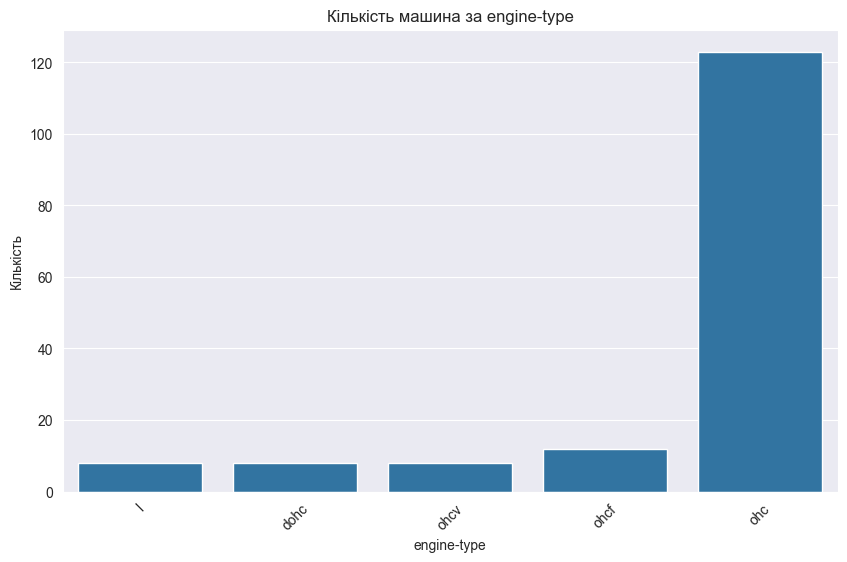

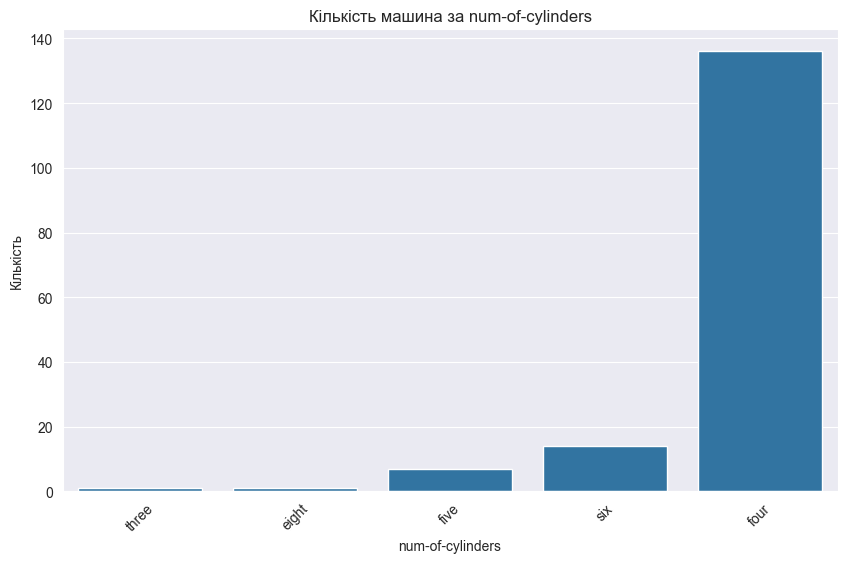

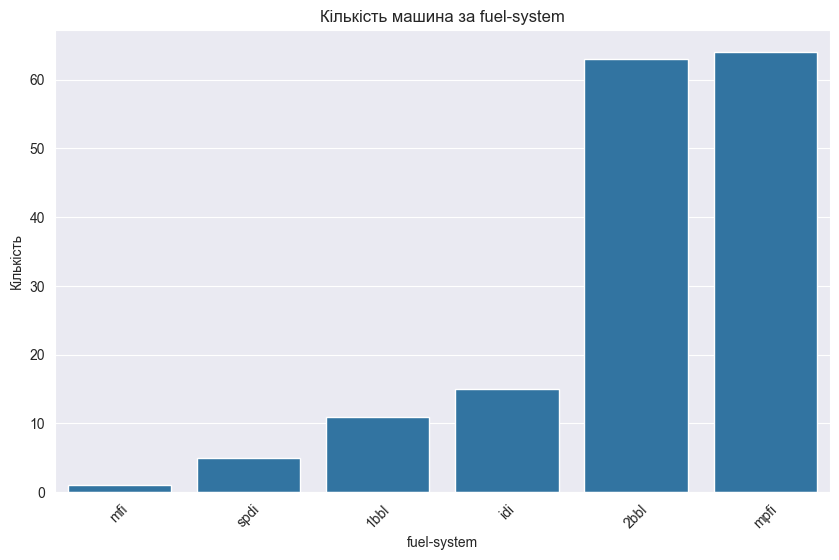

In [20]:
categorical_features = auto_data.select_dtypes(include=['object']).columns.tolist()

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sorted_values = auto_data[feature].value_counts().sort_values() 
    sns.countplot(x=feature, data=auto_data, order=sorted_values.index) 
    plt.title(f'Кількість машина за {feature}')
    plt.xlabel(feature)
    plt.ylabel('Кількість')
    plt.xticks(rotation=45)
    plt.show()

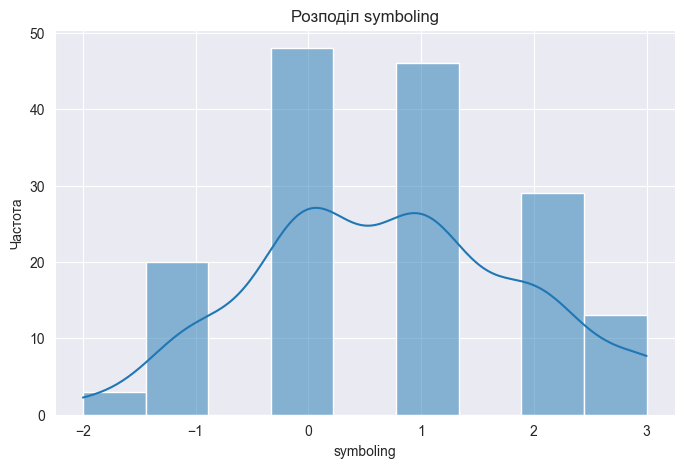

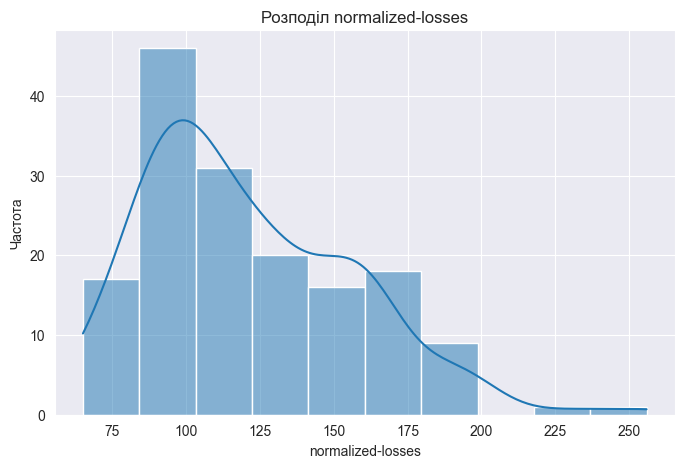

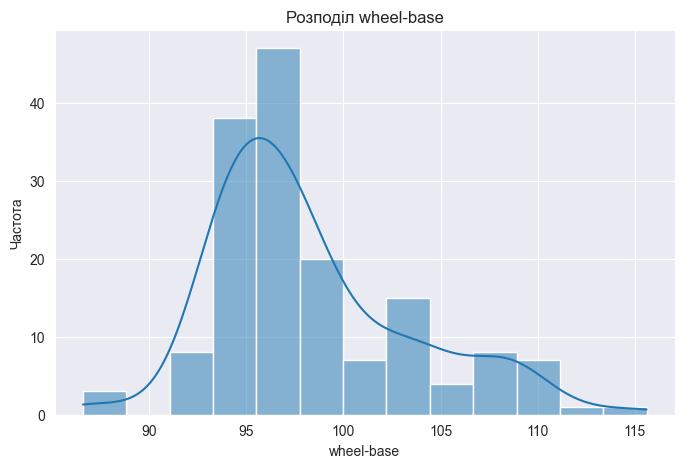

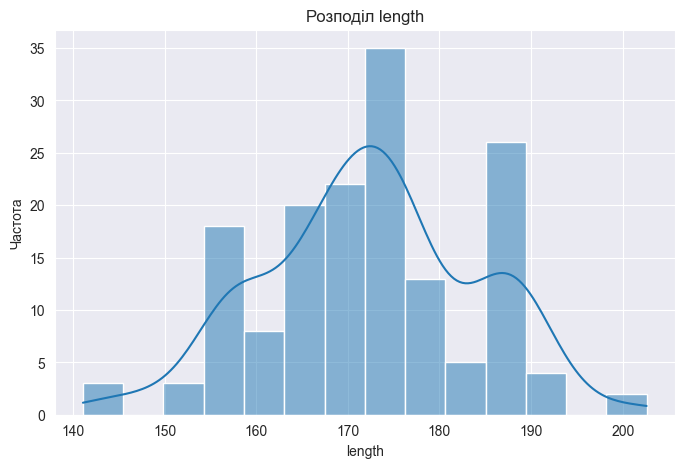

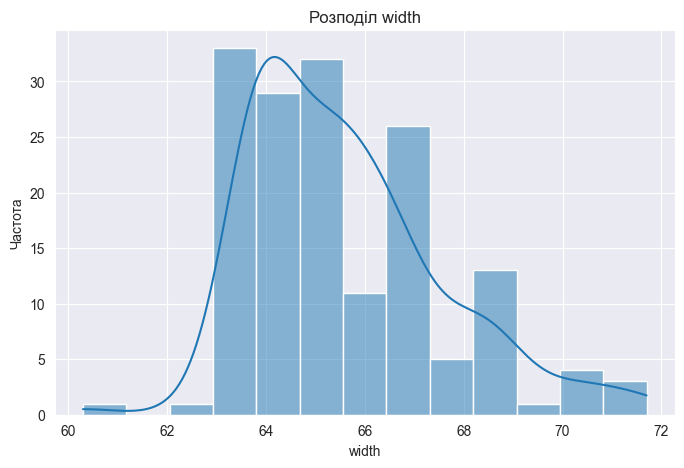

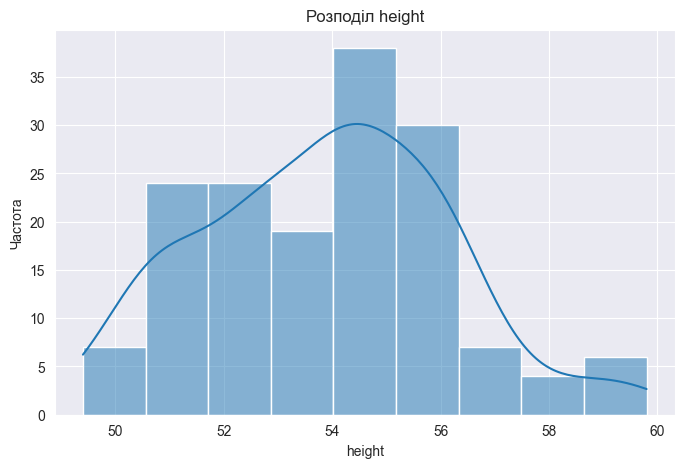

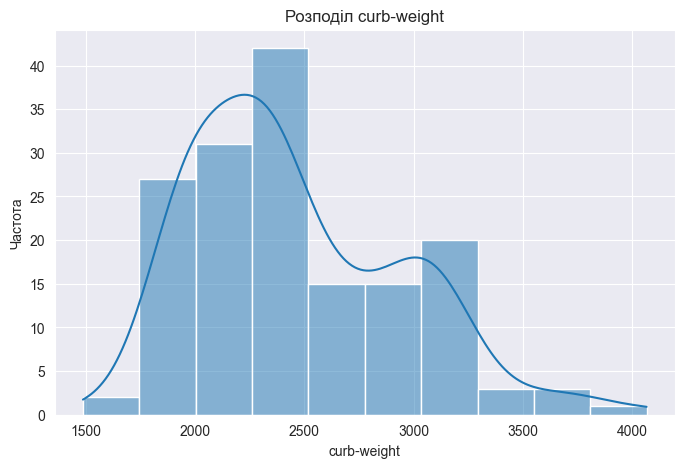

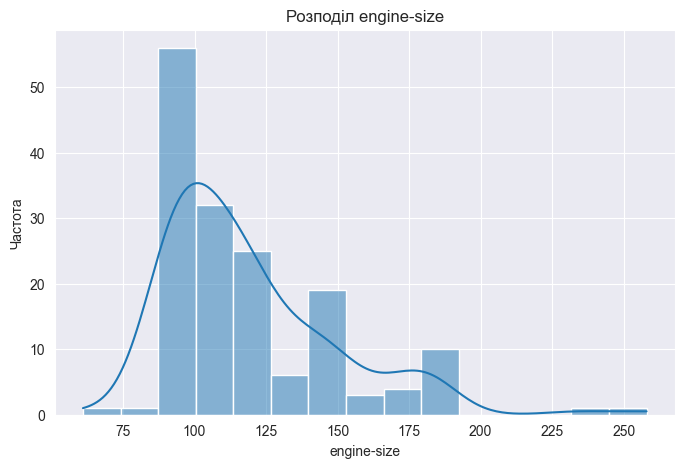

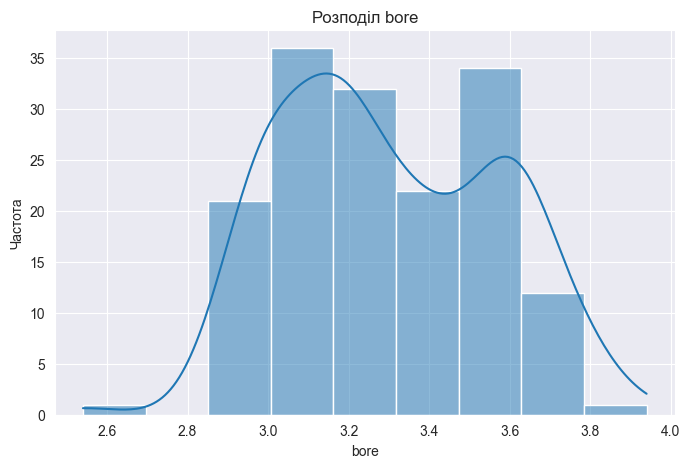

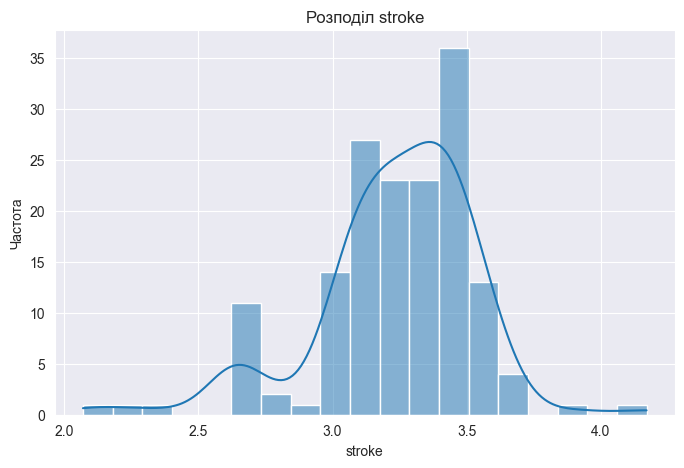

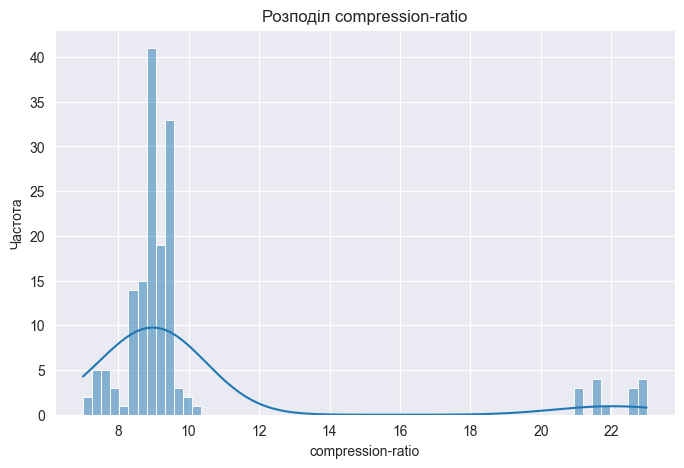

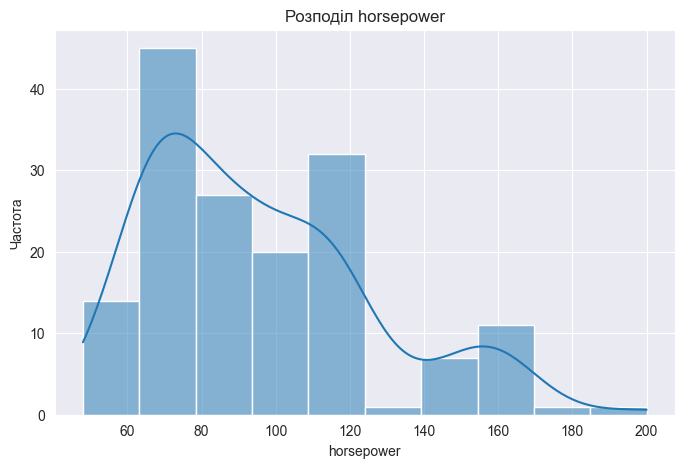

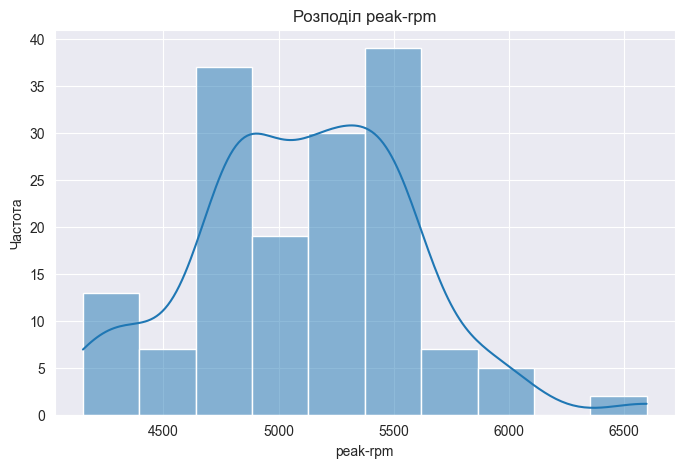

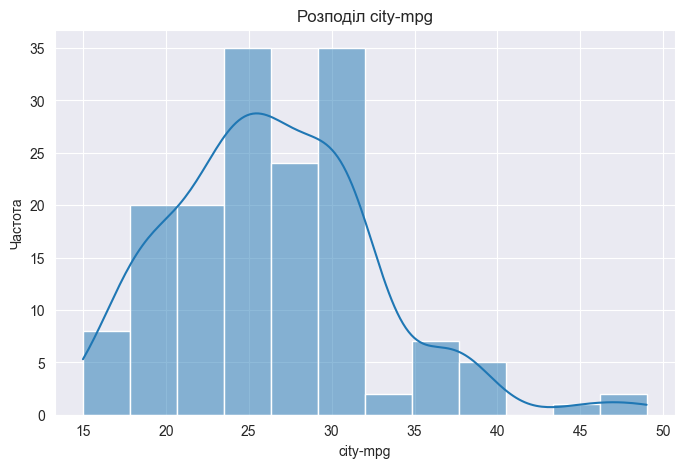

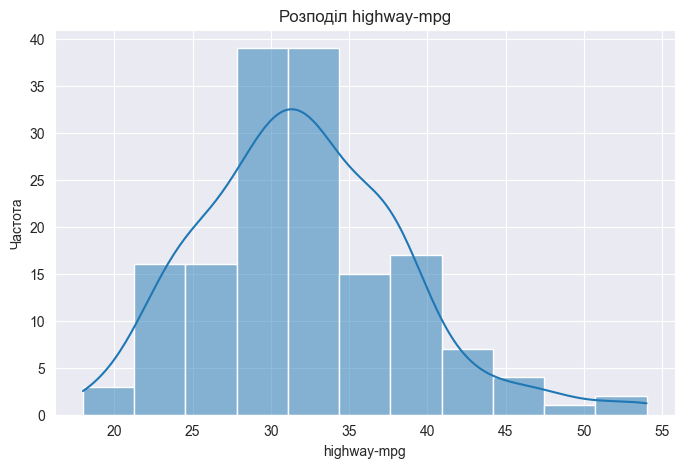

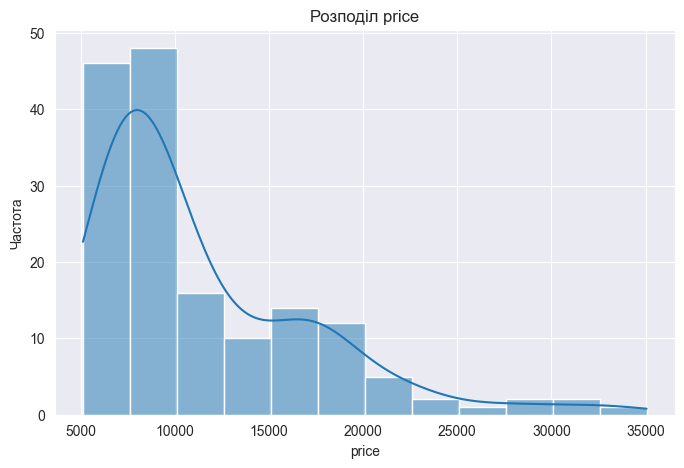

In [21]:
numeric_features = auto_data.select_dtypes(include=['float64', 'int64'])

for feature in numeric_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(auto_data[feature], kde=True)
    plt.title(f'Розподіл {feature}')
    plt.ylabel('Частота')
    plt.show()

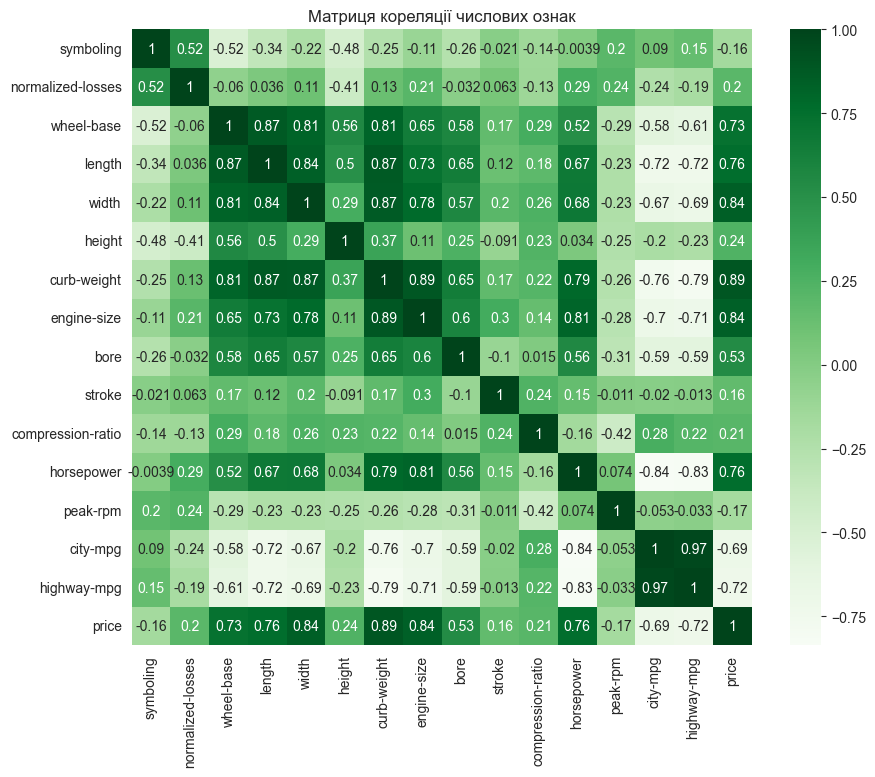

In [22]:
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.title('Матриця кореляції числових ознак')
plt.show()

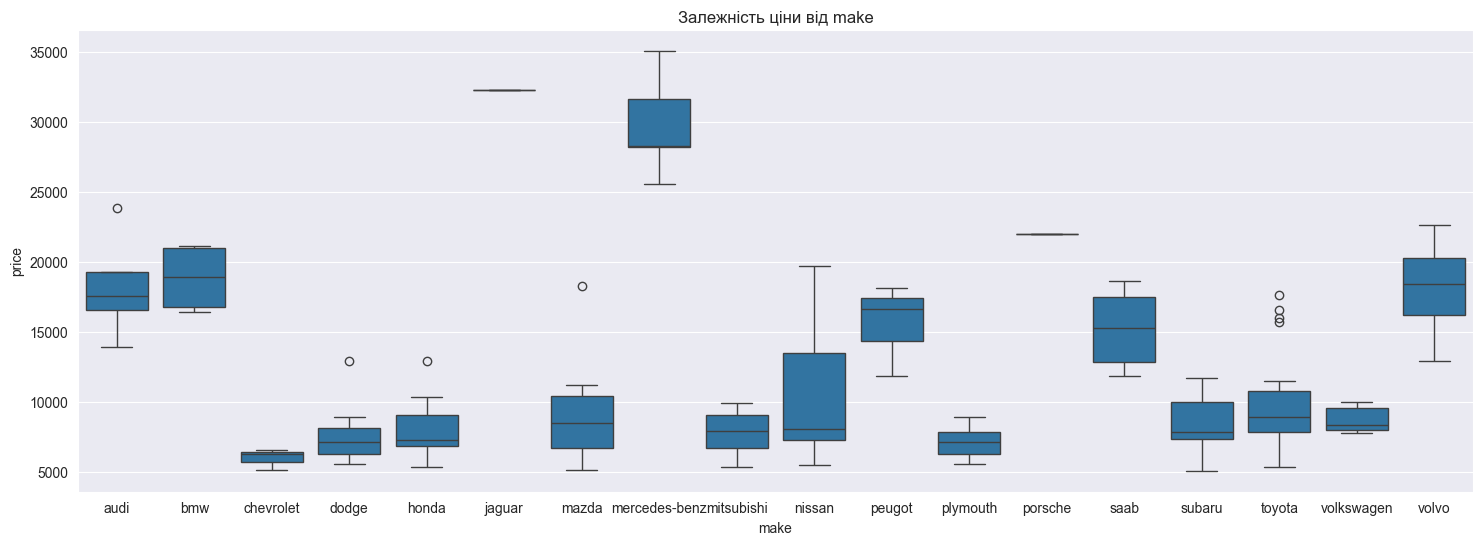

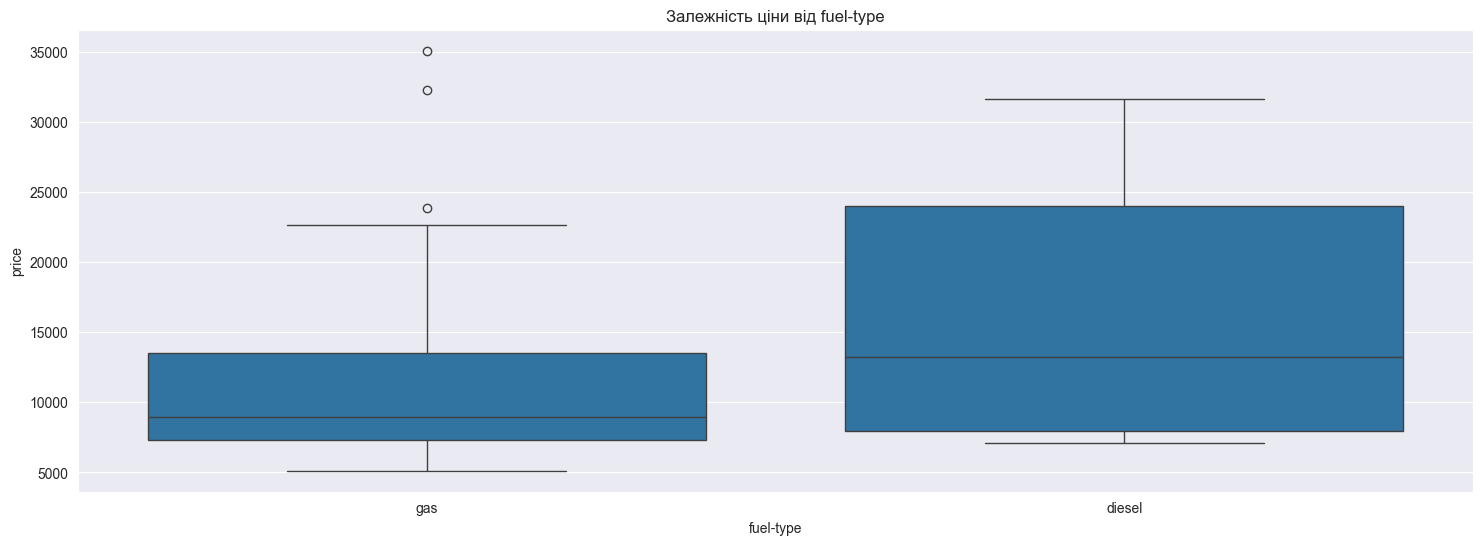

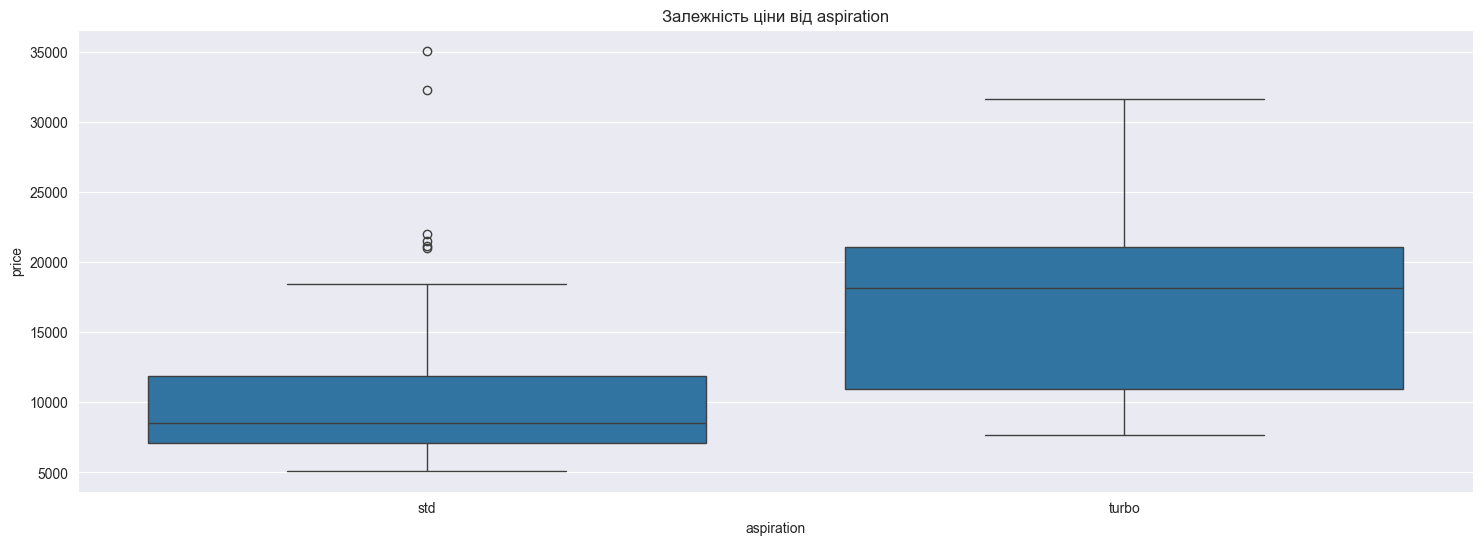

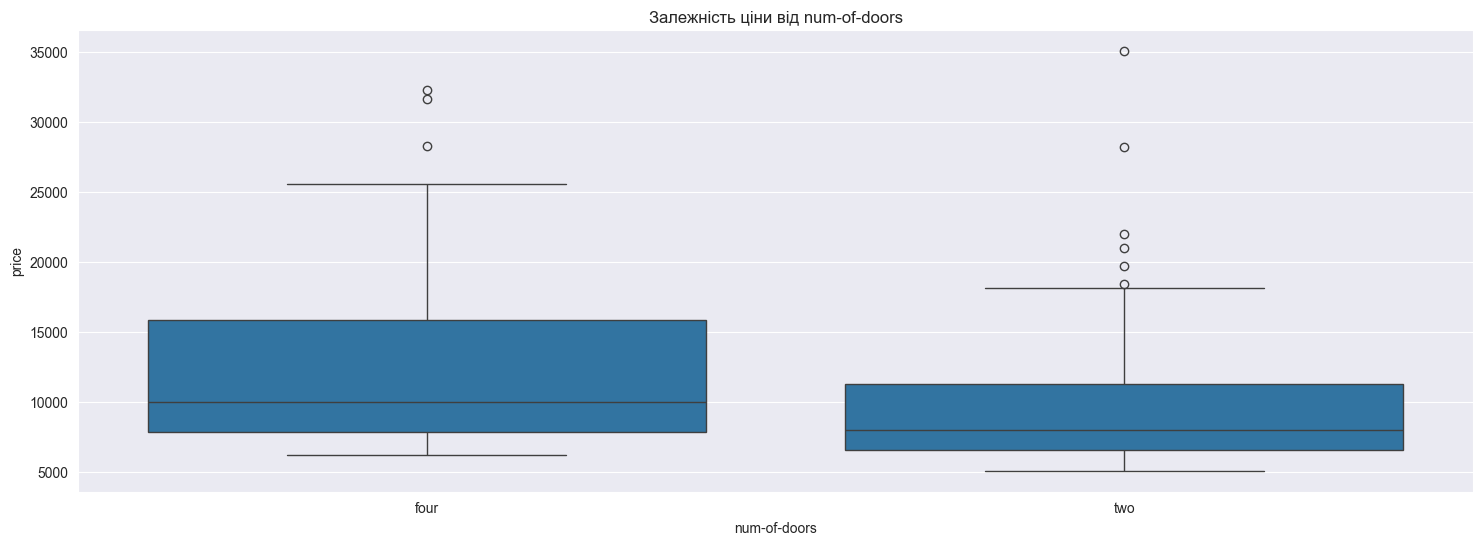

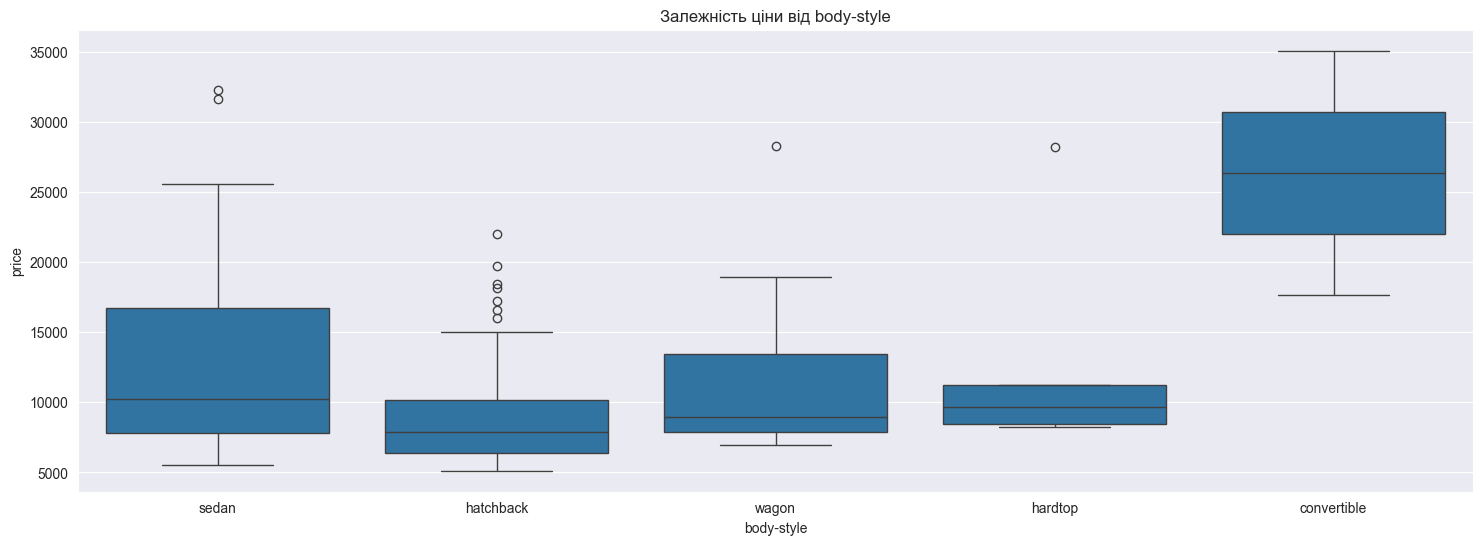

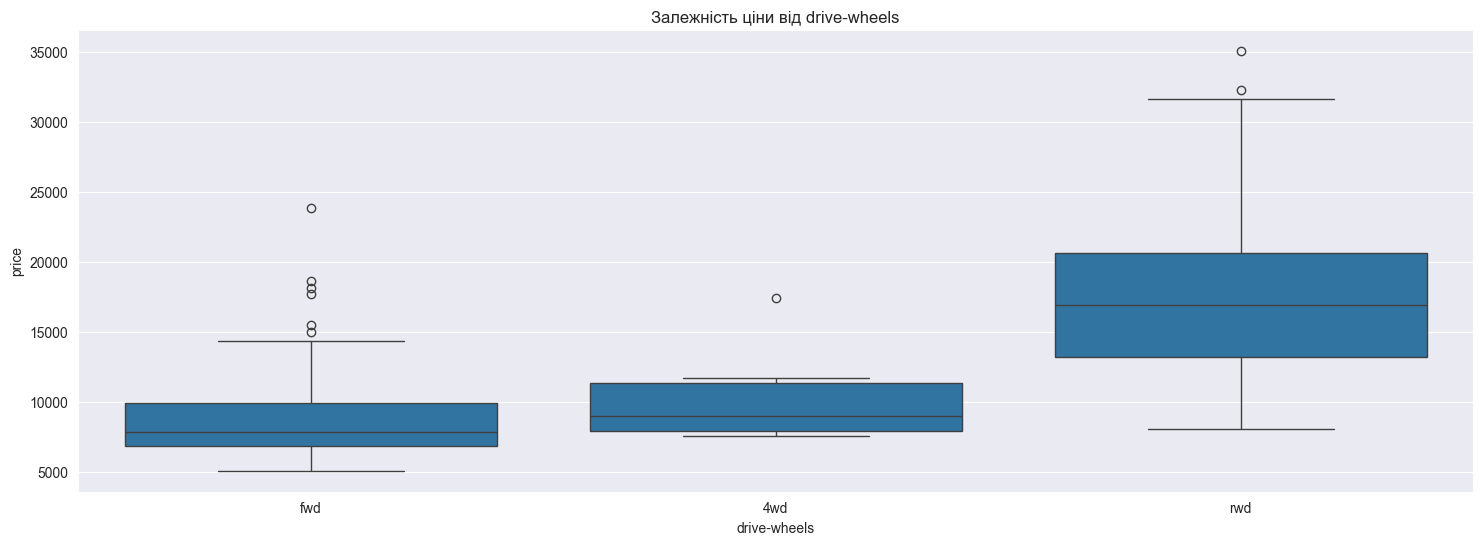

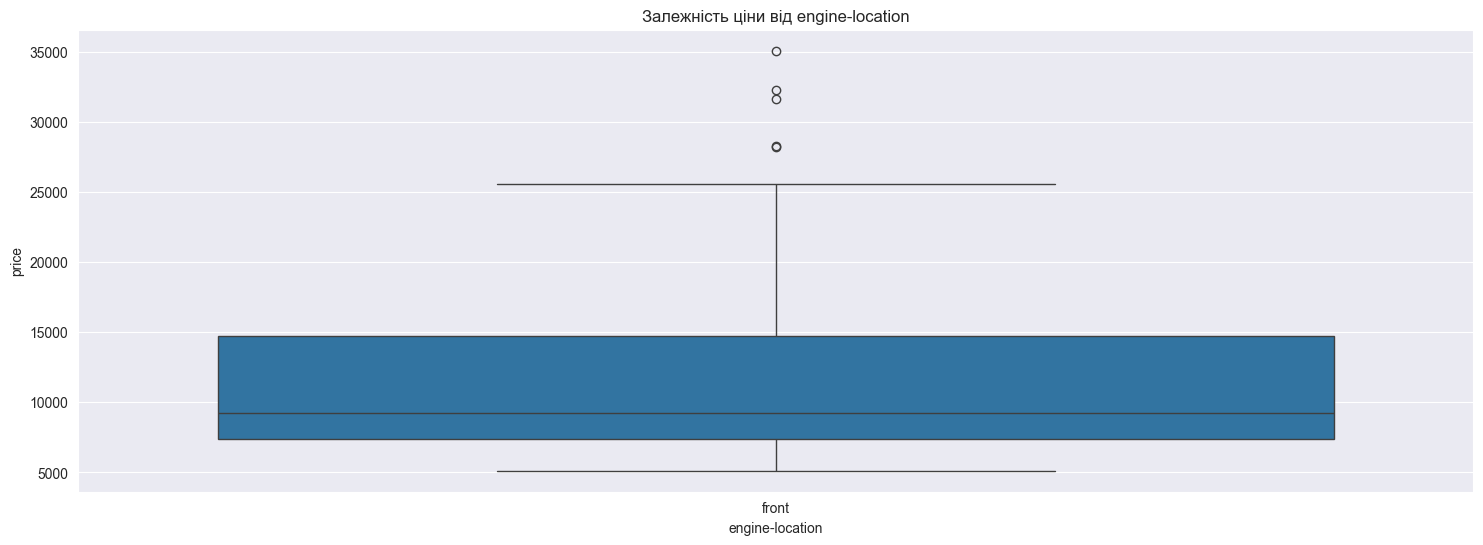

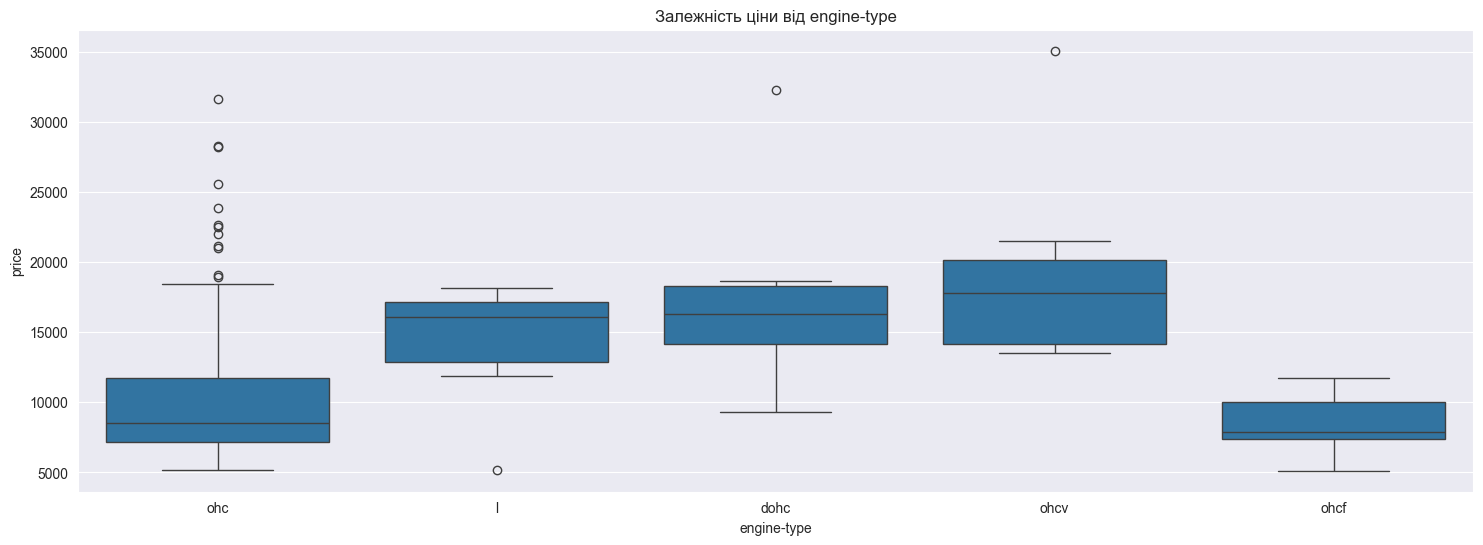

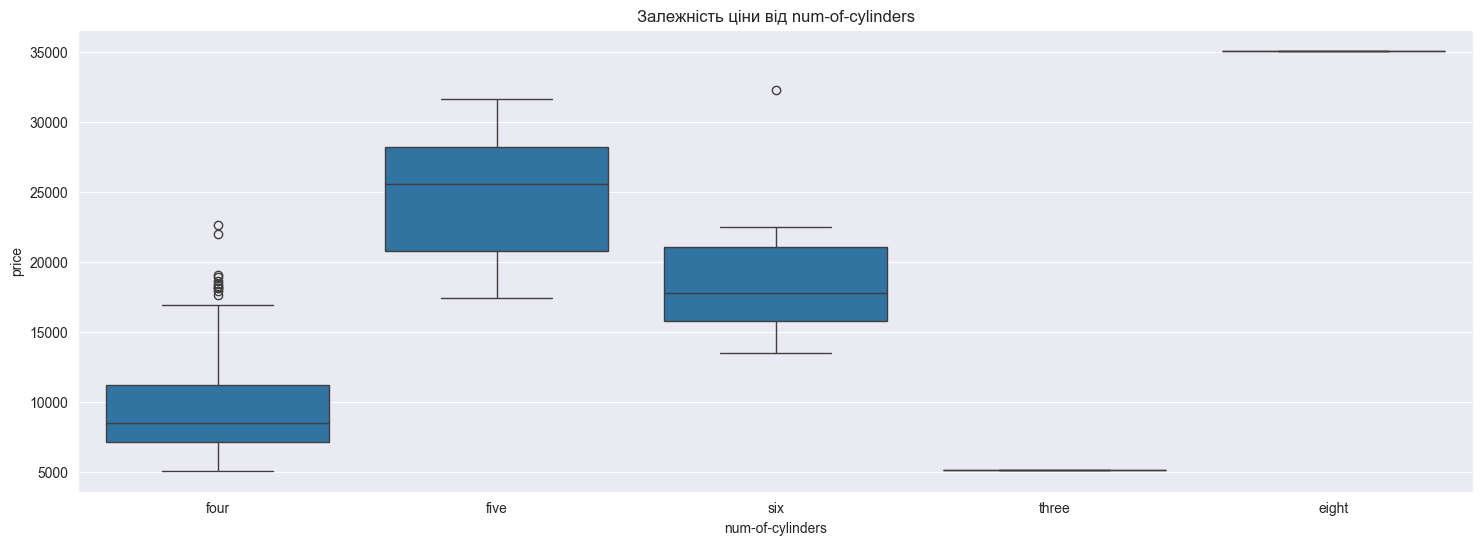

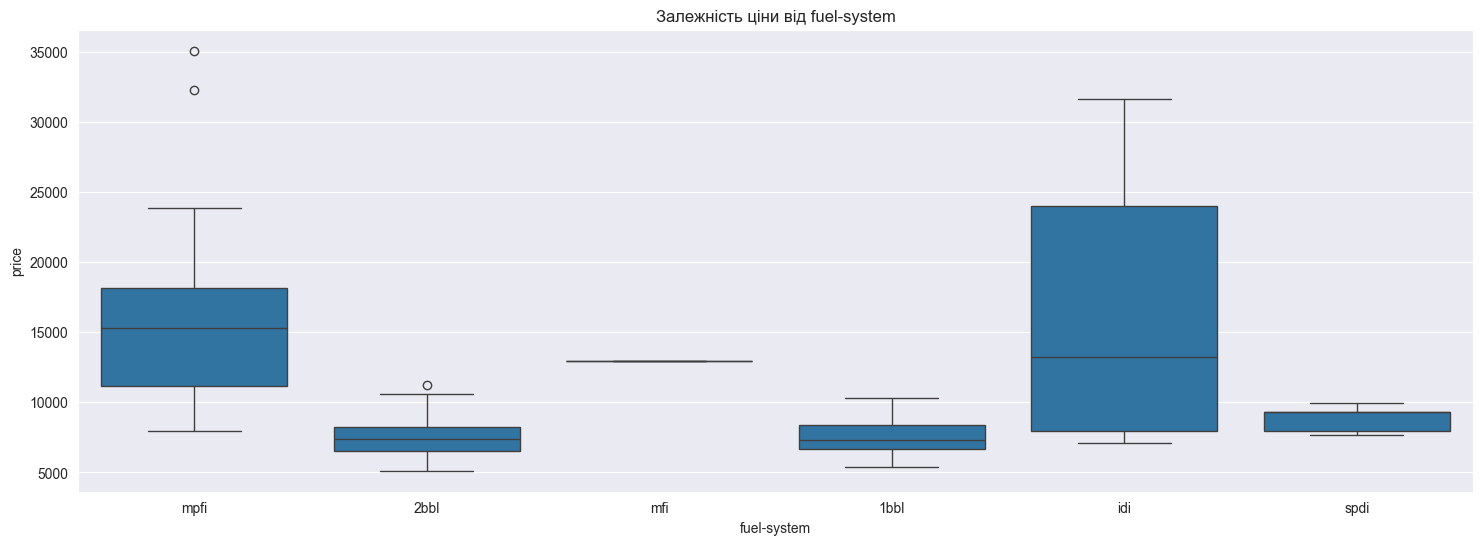

In [23]:
for feature in categorical_features:
    plt.figure(figsize=(18, 6))
    sns.boxplot(x=feature, y='price', data=auto_data)
    plt.title(f'Залежність ціни від {feature}')
    plt.show()

In [24]:
target = numeric_features['price']
features = numeric_features.drop('price', axis=1)

selectorVariance = VarianceThreshold()
selectorVariance.fit(features)

def udf_pearsonr(X, y):
    result = np.array([pearsonr(x, y) for x in X.T]) # list of (pearsonr, p-value)
    return np.absolute(result[:,0]), result[:,1] 

selectorPearson = SelectKBest(udf_pearsonr, k='all')
selectorPearson.fit(features, target) 

selectorFscore = SelectKBest(f_classif, k='all')
selectorFscore.fit_transform(features, target)

selectorMutual = SelectKBest(mutual_info_classif, k='all')
selectorMutual.fit(features, target)

ranked_data = pnd.DataFrame(index=features.columns)
ranked_data['VarianceThreshold'] = selectorVariance.variances_
ranked_data['PearsonCorrelation'] = selectorPearson.scores_
ranked_data['F-Score'] = selectorFscore.scores_
ranked_data['MutualInformation'] = selectorMutual.scores_

print(ranked_data)

                   VarianceThreshold  PearsonCorrelation    F-Score  \
symboling                   1.414501            0.162794   1.890580   
normalized-losses         191.000000            0.202761   6.441354   
wheel-base                 26.534249            0.734419   9.358178   
length                     61.500000            0.760952  13.378176   
width                       3.770383            0.843371  17.591349   
height                      5.114905            0.244836   2.445972   
curb-weight              2578.000000            0.893639  40.053414   
engine-size               197.000000            0.841496  28.667576   
bore                        0.071019            0.533890   4.099387   
stroke                      0.086412            0.160664   3.533610   
compression-ratio          15.032868            0.209361   1.162921   
horsepower                152.000000            0.759874  22.820130   
peak-rpm                 2450.000000            0.171916   4.459699   
city-m

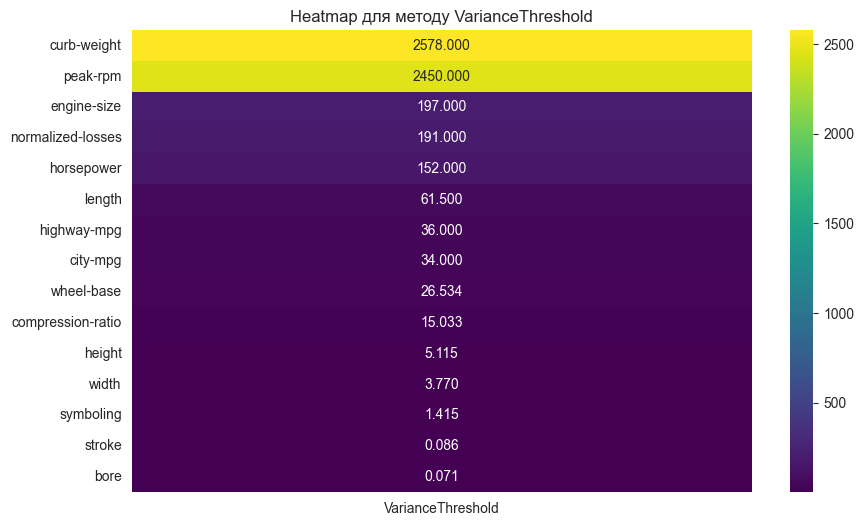

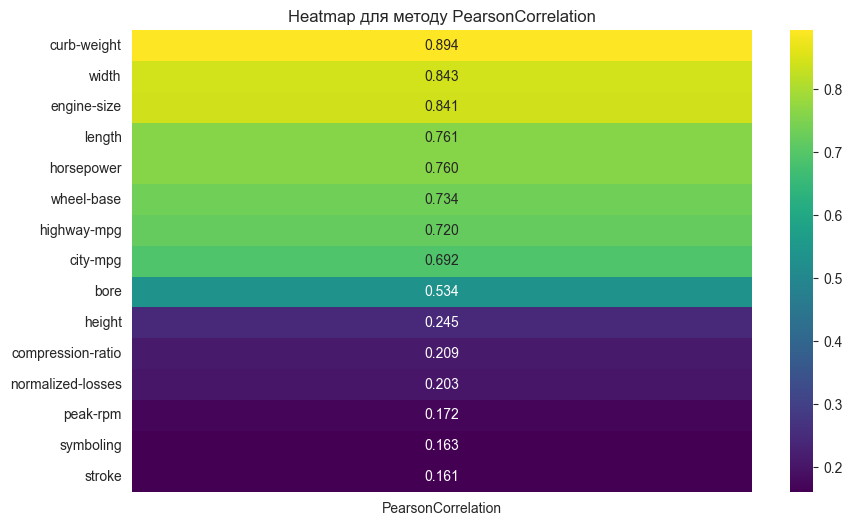

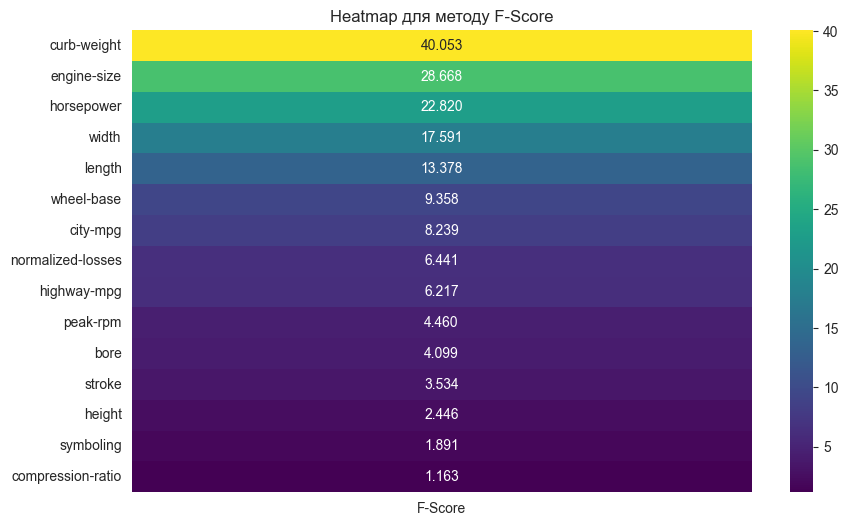

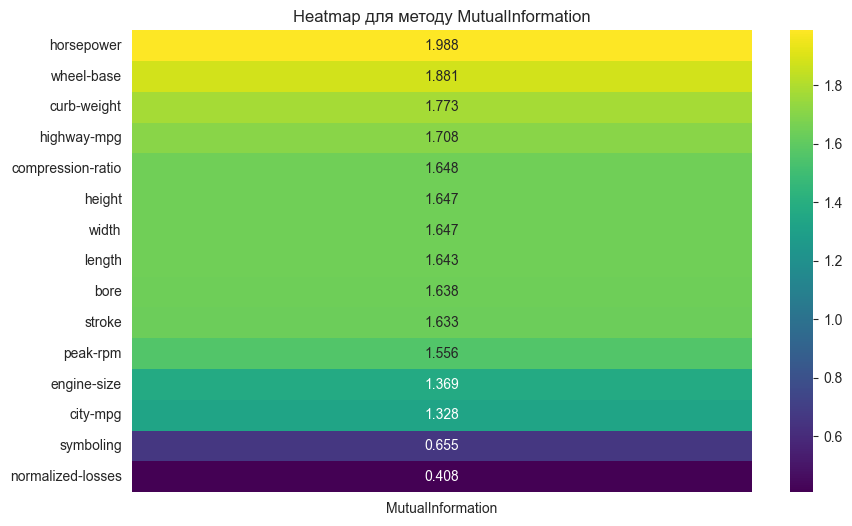

In [25]:
methods = ['VarianceThreshold', 'PearsonCorrelation', 'F-Score', 'MutualInformation']
for method in methods:
    plt.figure(figsize=(10, 6))
    sns.heatmap(ranked_data[[method]].sort_values(by=method, ascending=False),annot=True, fmt=".3f", cmap='viridis')
    plt.title(f'Heatmap для методу {method}')
    plt.show()